## LS via Row Reduction

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
import scipy.io as sio

In [2]:
m = 10
n = 3

# Create the data
X = np.random.randn(m,n) # design matrix
y = np. random.randn(m,1) # outcome vector, give it orientation

np.shape(y)

(10, 1)

In [3]:
# Apply rref directly
Xy = Matrix(np.concatenate([X,y],axis=1))
print(Xy.rref())

(Matrix([
[1, 0, 0, 0],
[0, 1, 0, 0],
[0, 0, 1, 0],
[0, 0, 0, 1],
[0, 0, 0, 0],
[0, 0, 0, 0],
[0, 0, 0, 0],
[0, 0, 0, 0],
[0, 0, 0, 0],
[0, 0, 0, 0]]), (0, 1, 2, 3))


In [4]:
# Apply normal equations
XtX = X.T@X
Xty = X.T@y

# Augment them
normEQ = Matrix(np.concatenate([XtX, Xty], axis=1))
normEQ

Matrix([
[ 13.6005723581276,  2.27955040217146, -1.61843247308141,   2.82643337377223],
[ 2.27955040217146,     13.0573194064, -0.86966198308264,   4.18835067828672],
[-1.61843247308141, -0.86966198308264,  7.58485678433588, -0.225696199341826]])

In [5]:
Xsol = normEQ.rref()
Xsol = Xsol[0]
beta = Xsol[:,-1]

print(np.array(Xsol))
print()
print(beta)
# Identity matrix augmented to beta (see equations)

[[1 0 0 0.163012590334776]
 [0 1 0 0.294894520567050]
 [0 0 1 0.0388388643727611]]

Matrix([[0.163012590334776], [0.294894520567050], [0.0388388643727611]])


In [6]:
# Compare to left inverse
beta2 = np.linalg.inv(XtX)@Xty
print(beta2)

[[0.16301259]
 [0.29489452]
 [0.03883886]]


In [7]:
# Use solver
beta3 = np.linalg.solve(XtX,Xty)
print(beta3)

[[0.16301259]
 [0.29489452]
 [0.03883886]]


## Least-Squares Applications 1

In [8]:
# define the data vector
data = np.array([[-4,0,-3,1,2,8,5,8]]).T
N = len(data)
data.shape

(8, 1)

In [9]:
# define the design matrix
X = np.ones([N,1])
X.shape

(8, 1)

In [10]:
# Fit the model
b = np.linalg.solve(X.T@X, X.T@data)
b[0][0]

2.125

In [11]:
print(np.mean(data))

2.125


In [12]:
# Compute model-predicted values
yHat = X@b
yHat

array([[2.125],
       [2.125],
       [2.125],
       [2.125],
       [2.125],
       [2.125],
       [2.125],
       [2.125]])

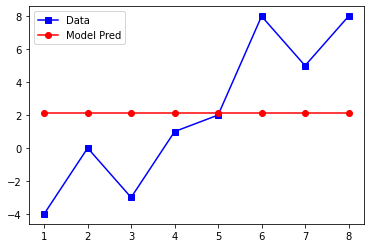

In [13]:
plt.plot(np.arange(1, N+1), data, "bs-", label="Data")
plt.plot(np.arange(1, N+1), yHat, "ro-", label="Model Pred")
plt.legend()
plt.show()

In [14]:
# Design new matrix with different values for x
X = np.array([np.arange(0,N)]).T
X

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5],
       [6],
       [7]])

In [15]:
# Fit the model
b = np.linalg.solve(X.T@X, X.T@data)
b[0][0]

0.9357142857142857

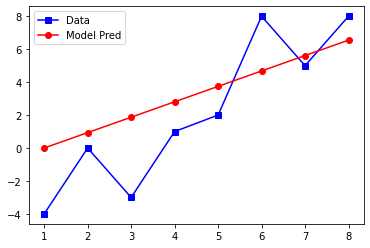

In [16]:
yHat = X@b
plt.plot(np.arange(1, N+1), data, "bs-", label="Data")
plt.plot(np.arange(1, N+1), yHat, "ro-", label="Model Pred")
plt.legend()
plt.show()

In [17]:
# Introduce an Intercept
X = np.concatenate([np.ones([N,1]), np.array([np.arange(0,N)]).T],axis=1)
X

array([[1., 0.],
       [1., 1.],
       [1., 2.],
       [1., 3.],
       [1., 4.],
       [1., 5.],
       [1., 6.],
       [1., 7.]])

In [18]:
# Fit the model
b = np.linalg.solve(X.T@X, X.T@data)
b[0][0]

-3.8333333333333344

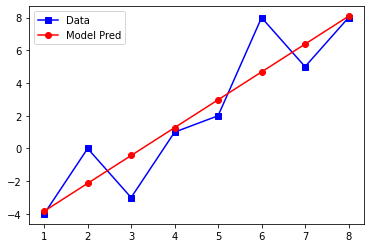

In [19]:
yHat = X@b
plt.plot(np.arange(1, N+1), data, "bs-", label="Data")
plt.plot(np.arange(1, N+1), yHat, "ro-", label="Model Pred")
plt.legend()
plt.show()

In [20]:
# Introduce non-linearity
X = np.concatenate([np.ones([N,1]), np.array([np.arange(0,N)**2]).T],axis=1)
X

array([[ 1.,  0.],
       [ 1.,  1.],
       [ 1.,  4.],
       [ 1.,  9.],
       [ 1., 16.],
       [ 1., 25.],
       [ 1., 36.],
       [ 1., 49.]])

In [21]:
b = np.linalg.solve(X.T@X, X.T@data)
b[0][0]

-1.8333333333333335

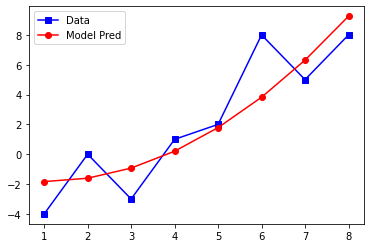

In [22]:
yHat = X@b
plt.plot(np.arange(1, N+1), data, "bs-", label="Data")
plt.plot(np.arange(1, N+1), yHat, "ro-", label="Model Pred")
plt.legend()
plt.show()

## Least-Square Applications 2

In [23]:
# Load the matlab data
data = sio.loadmat("EEG_RT_data.mat")
rts = data["rts"]
rts = rts[0]
EEGdata = data["EEGdata"]
frex = data["frex"]
frex = frex[0]

nTrials = len(rts)
nFrex = len(frex)

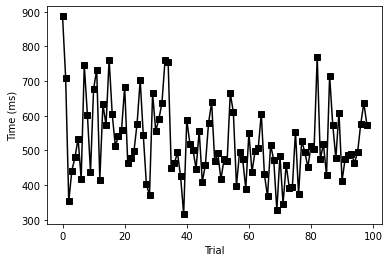

In [24]:
plt.plot(rts, "ks-")
plt.xlabel("Trial")
plt.ylabel("Time (ms)")
plt.show()

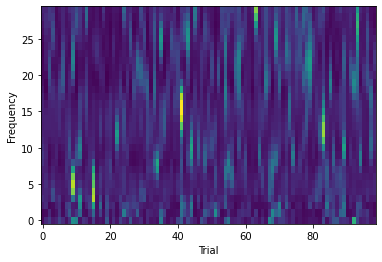

In [25]:
plt.imshow(EEGdata, origin="lower", aspect="auto")
plt.xlabel("Trial")
plt.ylabel("Frequency")
plt.show()

In [26]:
# Create a design model and fit it for one frequency only
X = np.concatenate([np.ones([nTrials-1,1]), # intercept
                    np.reshape(rts[0:-1], (nTrials-1,1)), # RTs
                    np.reshape(EEGdata[10,:-1], (nTrials-1,1))], #Brain
                  axis=1)
#X
b1 = np.linalg.solve(X.T@X, X.T@rts[1:])
b2 = np.linalg.lstsq(X,rts[1:],rcond=None)[0] # Another way
print(b1)
print()
print(b2)

[ 4.02435056e+02  2.25627111e-01 -2.33132473e+01]

[ 4.02435056e+02  2.25627111e-01 -2.33132473e+01]


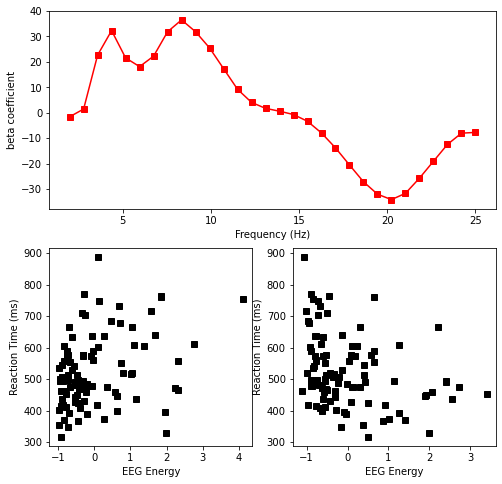

In [27]:
# Initialize the bea coefficient vector after dropping previous rxn time
b = np.zeros(len(frex))

# loop over frequencies
for fi in np.arange(0,len(frex)):
    
    # Design Matrix
    X = np.concatenate([np.ones([nTrials,1]),
                        np.reshape(EEGdata[fi,:], (nTrials,1))],
                       axis=1)
    
    # Compute parameters
    t = np.linalg.lstsq(X, rts, rcond=None)[0]
    b[fi] = t[1]
    
plt.figure(figsize=(8,8))
plt.subplot(211)
plt.plot(frex,b,"rs-")
plt.xlabel("Frequency (Hz)")
plt.ylabel("beta coefficient")

plt.subplot(223)
plt.plot(EEGdata[8,:],rts,"ks")
plt.xlabel("EEG Energy")
plt.ylabel("Reaction Time (ms)")

plt.subplot(224)
plt.plot(EEGdata[23,:],rts,"ks")
plt.xlabel("EEG Energy")
plt.ylabel("Reaction Time (ms)")
plt.show()

## Code Challenge: LS via QR Decomposition 

In [28]:
# generate random data
m = 10
n = 3

# Dsign Matrix
X = np.random.randn(m,n)
y = np.random.randn(m,1)

# QR Decomposition
Q,R = np.linalg.qr(X)

beta = np.linalg.solve(R.T@R, (Q@R).T@y)

# standard left-inverse methods
beta2 = np.linalg.solve(X.T@X,X.T@y)

beta3 = np.linalg.lstsq(X,y,rcond=None)[0]

print(beta)
print()
print(beta2)
print()
print(beta3)

[[0.60098734]
 [0.08491559]
 [0.397264  ]]

[[0.60098734]
 [0.08491559]
 [0.397264  ]]

[[0.60098734]
 [0.08491559]
 [0.397264  ]]
